In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as  plt
import pandas as pd
from Main import *
import time

In [3]:
List = [a[:-3] for a in os.listdir('/home/superman/data/stackoverflow/') if 'com.7z' in a] 

In [6]:
def myfun(karg):
    path = karg['path']
    name = karg['name']
    fnzip = path + name +'.7z'
    f_csv = path + name +'/'+name+'.csv'
    fname = path + name + '/Posts.xml'
    print('== unzip %s=='%fnzip,end='\r')
    try:
        start = time.perf_counter()
        if not os.path.exists('/home/superman/data/stackoverflow/%s/Posts.xml'%name):
            os.system('7z x %s -o/home/superman/data/stackoverflow/%s Posts.xml'%(fnzip,name))
        print("===Finish unzip %s %.2f==="%(fnzip,time.perf_counter()-start),end='\r')
        Ts,P,Ns = Main(fname,f_csv)
        res = {'Ts':Ts,'P':P,"Ns":Ns,'name':name}
    except:
        res={}
    return res
ps = [{'path':'/home/superman/data/stackoverflow/','name':name} for name in List]
#Res = multifun(myfun,ps)

In [4]:
Dict={}
err=[]

In [5]:
err=[]
start0 = time.perf_counter()
n=0
for name in List:
    n+=1
    if name not in Dict:
        try:
            path = '/home/superman/data/stackoverflow/'
            fnzip = path + name +'.7z'
            f_csv = path + name +'/'+name+'.csv'
            fname = path + name + '/Posts.xml'
            print('== unzip %s=='%fnzip,end='\r')
            start = time.perf_counter()
            if not os.path.exists('/home/superman/data/stackoverflow/%s/Posts.xml'%name):
                os.system('7z x %s -o/home/superman/data/stackoverflow/%s Posts.xml'%(fnzip,name))
            print("[ %d / %d ]===Finish unzip %s %.2f==="%(n,len(List),fnzip,time.perf_counter()-start),end='\r')
            Ts,P,Ns = Main(fname,f_csv)
            Dict[name]={'Ts':Ts,'P':P,"Ns":Ns}
        except:
            print('!Error: ',name)
            err.append(name)
            pass
print("===Finish  %s %.2f==="%(fnzip,time.perf_counter()-start0))
print("err %s"%(' '.join([a for a in err])))

Loading /home/superman/data/stackoverflow/politics.stackexchange.com/Posts.xmlz 0.00===
[finish] GetTime ==Time 0.97==
[finish] getQA ==Time 0.39==
[finish] TeamCal ==Time 3.29==TimeCost 3.29===
==[Finish] /home/superman/data/stackoverflow/politics.stackexchange.com/Posts.xml ==
Loading /home/superman/data/stackoverflow/graphicdesign.stackexchange.com/Posts.xmlz 0.00===
!Error:  graphicdesign.stackexchange.com
Loading /home/superman/data/stackoverflow/electronics.stackexchange.com/Posts.xmlz 0.00===
[finish] GetTime ==Time 11.50==
[finish] getQA ==Time 4.50==
[finish] TeamCal ==Time 64.26==lTimeCost 64.26===
==[Finish] /home/superman/data/stackoverflow/electronics.stackexchange.com/Posts.xml ==
Loading /home/superman/data/stackoverflow/history.stackexchange.com/Posts.xmlz 0.00===
[finish] GetTime ==Time 1.12==
[finish] getQA ==Time 0.44==
[finish] TeamCal ==Time 4.01==TimeCost 4.01===
==[Finish] /home/superman/data/stackoverflow/history.stackexchange.com/Posts.xml ==
Loading /home/supe

In [9]:
save_pkl(Dict,fname='./Dict.pkl')

0

In [46]:
List

['politics.stackexchange.com',
 'graphicdesign.stackexchange.com',
 'electronics.stackexchange.com',
 'history.stackexchange.com',
 '._stackoverflow.com-PostHistory',
 'biology.stackexchange.com',
 'movies.stackexchange.com',
 '._stackoverflow.com-Users',
 'philosophy.stackexchange.com',
 '._stackoverflow.com-Comments',
 '._stackoverflow.com-Badges',
 'engineering.stackexchange.com',
 'cs.stackexchange.com',
 '._stackoverflow.com-Votes',
 'music.stackexchange.com',
 'mathematica.stackexchange.com',
 'bitcoin.stackexchange.com',
 'economics.stackexchange.com',
 'physics.stackexchange.com',
 '._stackoverflow.com-Posts',
 'math.stackexchange.com',
 '._stackoverflow.com-Tags',
 'ai.stackexchange.com',
 'chemistry.stackexchange.com',
 'gaming.stackexchange.com',
 '._stackoverflow.com-PostLinks',
 'datascience.stackexchange.com',
 'astronomy.stackexchange.com',
 'law.stackexchange.com',
 'softwarerecs.stackexchange.com']

In [33]:
import seaborn as sns
sns.set(style="ticks")

Text(0, 0.5, 'P(Accepted)')

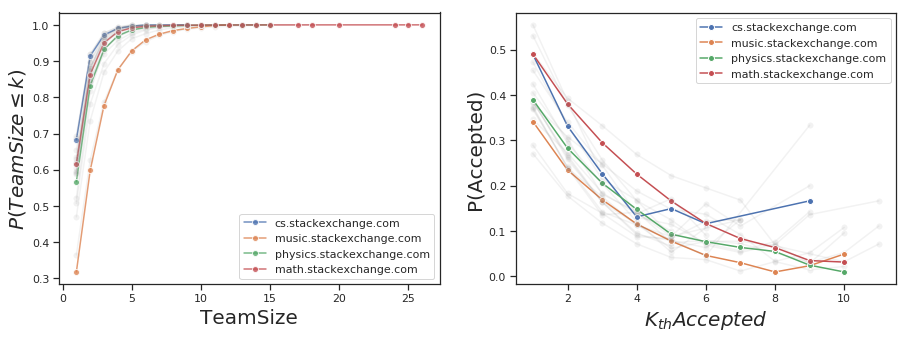

In [82]:
showlst =['math.stackexchange.com','cs.stackexchange.com','physics.stackexchange.com','music.stackexchange.com']
plt.figure(figsize=(15,5))
plt.subplot(121)
for name in Dict:
    P = Dict[name]['P']
    Ts = Dict[name]['Ts']
    Ns = Dict[name]['Ns']
    sNs = np.cumsum(Ns)
    sNs = sNs/sNs[-1]
    if name in showlst:
        plt.plot(Ts,sNs,'o-',mec='w',label=name,alpha=0.8)
    else:
        plt.plot(Ts,sNs,'o-',mec='w',c='gray',alpha=0.1)
plt.legend()
plt.xlabel('TeamSize',fontsize=20)
plt.ylabel("$P(TeamSize\leq k)$",fontsize=20)



plt.subplot(122)
for name in Dict:
    P1 = Dict[name]['P']
    s1 = [a+b for (a,b) in P1]
    s = np.cumsum(s1[::-1])[::-1]
    P = [a/si for ((a,b),si) in zip(P1,s)] 
    Ts = Dict[name]['Ts']
    if name in showlst:
        plt.plot(Ts[:10],P[:10],'o-',mec='w',label=name)
    else:
         plt.plot(Ts[:10],P[:10],'o-',mec='w',c='gray',alpha=0.1)
#     if name in showlst:
#         plt.plot(Ts,P,'o-',mec='w',label=name)
#     else:
#          plt.plot(Ts,P,'o-',mec='w',c='gray',alpha=0.1)
plt.legend()
#plt.xticks(range(1,7),range(1,7))
plt.xlabel('$K_{th}  Accepted$',fontsize=20)
plt.ylabel("P(Accepted)",fontsize=20)

Text(0, 0.5, 'P(Accepted)')

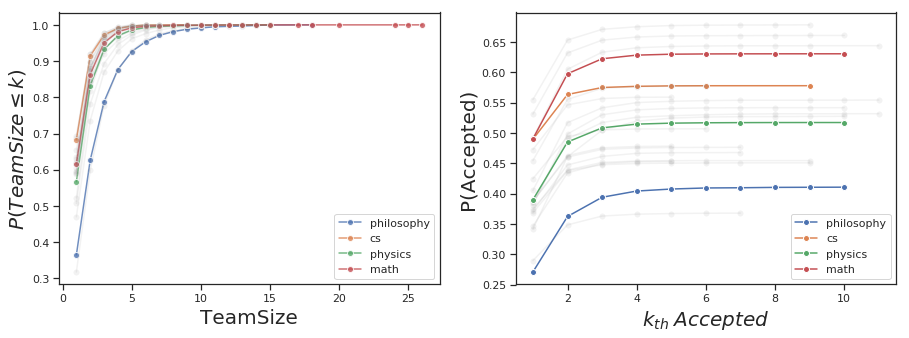

In [89]:
showlst =['math.stackexchange.com','cs.stackexchange.com','physics.stackexchange.com','philosophy.stackexchange.com']
plt.figure(figsize=(15,5))
plt.subplot(121)
for name in Dict:
    P = Dict[name]['P']
    Ts = Dict[name]['Ts']
    Ns = Dict[name]['Ns']
    sNs = np.cumsum(Ns)
    sNs = sNs/sNs[-1]
    if name in showlst:
        plt.plot(Ts,sNs,'o-',mec='w',label=name.split('.')[0],alpha=0.8)
    else:
        plt.plot(Ts,sNs,'o-',mec='w',c='gray',alpha=0.1)
plt.legend()
plt.xlabel('TeamSize',fontsize=20)
plt.ylabel("$P(TeamSize\leq k)$",fontsize=20)



plt.subplot(122)
AA=[]
for name in Dict:
    P1 = Dict[name]['P']
    s1 = [a for (a,b) in P1]
    s = np.cumsum(s1)
    s2 = sum([a+b for (a,b) in P1])
    P = [si/s2 for si in s] 
    Ts = Dict[name]['Ts']
    if name in showlst:
        plt.plot(Ts[:10],P[:10],'o-',mec='w',label=name.split('.')[0])
    else:
         plt.plot(Ts[:10],P[:10],'o-',mec='w',c='gray',alpha=0.1)
    AA.append([name,P])
#     if name in showlst:
#         plt.plot(Ts,P,'o-',mec='w',label=name)
#     else:
#          plt.plot(Ts,P,'o-',mec='w',c='gray',alpha=0.1)
plt.legend()
#plt.xticks(range(1,7),range(1,7))
plt.xlabel('$k_{th} \; Accepted$',fontsize=20)
plt.ylabel("P(Accepted)",fontsize=20)

Text(0, 0.5, '$P(Accepted|k \\leq N)$')

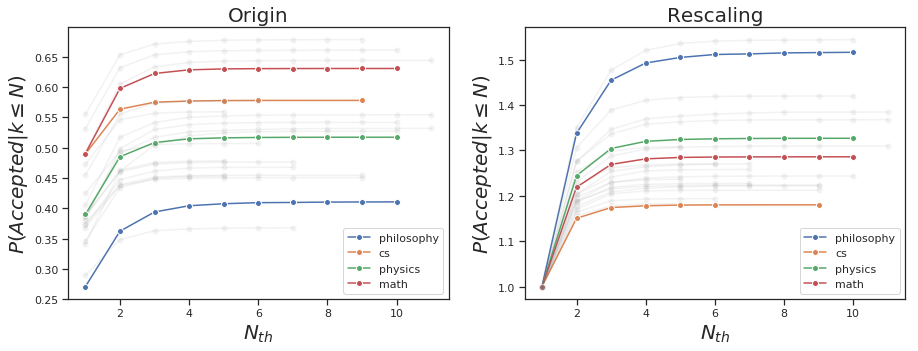

In [97]:
plt.figure(figsize=(15,5))
plt.subplot(121)
AA=[]
plt.title("Origin",fontsize=20)
for name in Dict:
    P1 = Dict[name]['P']
    s1 = [a for (a,b) in P1]
    s = np.cumsum(s1)
    s2 = sum([a+b for (a,b) in P1])
    P = [si/s2 for si in s] 
    Ts = Dict[name]['Ts']
    if name in showlst:
        plt.plot(Ts[:10],P[:10],'o-',mec='w',label=name.split('.')[0])
    else:
         plt.plot(Ts[:10],P[:10],'o-',mec='w',c='gray',alpha=0.1)
    AA.append([name,P])
#     if name in showlst:
#         plt.plot(Ts,P,'o-',mec='w',label=name)
#     else:
#          plt.plot(Ts,P,'o-',mec='w',c='gray',alpha=0.1)
plt.legend()
#plt.xticks(range(1,7),range(1,7))
plt.xlabel('$N_{th}$',fontsize=20)
plt.ylabel("$P(Accepted|k \leq N)$",fontsize=20)

plt.subplot(122)
plt.title("Rescaling",fontsize=20)
for name in Dict:
    P1 = Dict[name]['P']
    s1 = [a for (a,b) in P1]
    s = np.cumsum(s1)
    s2 = sum([a+b for (a,b) in P1])
    P = [si/s2 for si in s] 
    Ts = Dict[name]['Ts']
    p0 = P[0]
    if name in showlst:
        plt.plot(Ts[:10],P[:10]/p0,'o-',mec='w',label=name.split('.')[0])
    else:
         plt.plot(Ts[:10],P[:10]/p0,'o-',mec='w',c='gray',alpha=0.1)
    AA.append([name,P])
#     if name in showlst:
#         plt.plot(Ts,P,'o-',mec='w',label=name)
#     else:
#          plt.plot(Ts,P,'o-',mec='w',c='gray',alpha=0.1)
plt.legend()
#plt.xticks(range(1,7),range(1,7))
plt.xlabel('$N_{th}$',fontsize=20)
plt.ylabel("$P(Accepted|k \leq N)$",fontsize=20)

In [5]:
# Step1 clean data
# import Main
# path1 = "../../data/stackoverflow/old_phys/"
# fname = path1 + "Posts.xml"
# f_csv = "./data/Posts_phys.csv"
#data = CleanData(fname=fname,f_csv=f_csv)

# # Step2 
# #找到所有的问题和回答
# data = pd.read_csv(f_csv)
# Question = data[data.PostTypeId==1]
# Answer = data[data.PostTypeId==2]
# Time = GetTime(data)
# QA = getQA(Answer)
# QA_sortbytime,QA_uptoaccept,Q_AcceptTeam,Q_TotalTeam = TeamCal(QA,Question,Time)
# Ts = sorted(Q_AcceptTeam.keys())
# P=[]
# for ts in  Ts:
#     P.append(len(Q_AcceptTeam[ts])/len(Q_TotalTeam[ts]))

In [67]:
sNs = np.cumsum(Ns)

Text(0, 0.5, 'P(Accepted)')

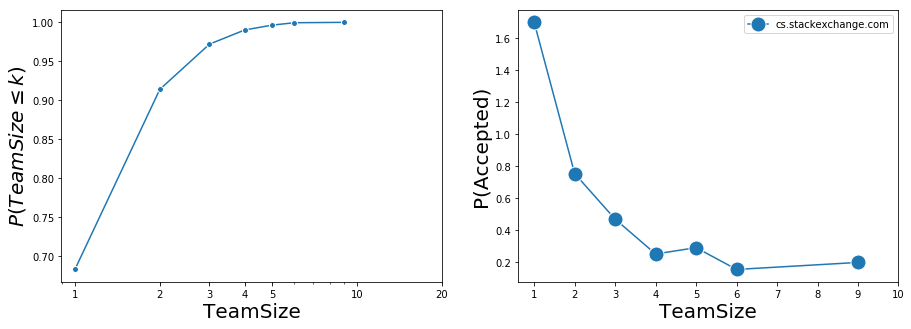

In [69]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(Ts,sNs/sNs[-1],'o-',mec='w')
plt.xscale('log')
plt.xticks([1,2,3,4,5,10,20],[1,2,3,4,5,10,20])
plt.xlabel('TeamSize',fontsize=20)
plt.ylabel("$P(TeamSize\leq k)$",fontsize=20)
plt.subplot(122)
plt.plot(Ts[:10],P[:10],'o-',ms=15,mec='w',label=name)
#plt.plot(Ts[:10],[func(t,pc) for t in range(1,11)],'>-',mec='w',label='Null Model',ms=15)
plt.legend()
plt.xticks(range(1,11),range(1,11))
plt.xlabel('TeamSize',fontsize=20)
plt.ylabel("P(Accepted)",fontsize=20)